In [1]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   validation_split=0.2)

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [15]:
train_generator = train_datagen.flow_from_directory(
        '../data/archive/train/eyes',  # This is the source directory for training images
        target_size=(80, 80),  # All images will be resized to 150x150
        # Since we use binary_crossentropy loss, we need binary labels
        shuffle=True,
        class_mode='binary',
        batch_size=16,
        subset='training')

validation_generator = train_datagen.flow_from_directory(
        '../data/archive/train/eyes',  # This is the source directory for training images
        target_size=(80, 80),  # All images will be resized to 150x150
        # Since we use binary_crossentropy loss, we need binary labels
        shuffle=True,
        class_mode='binary',
        batch_size=16,
        subset='validation')

Found 1162 images belonging to 2 classes.
Found 290 images belonging to 2 classes.


In [16]:
base_model = tf.keras.applications.InceptionResNetV2(
    include_top=False, weights='imagenet', input_shape=(80,80,3)
)

In [17]:
model = tf.keras.Sequential([
  base_model,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [18]:
model.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [19]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(
      train_generator,
      validation_data = validation_generator,
      epochs=50,
      verbose=1,
      callbacks=early_stop)

Epoch 1/50
73/73 [==============================] - 55s 315ms/step - loss: 0.2538 - accuracy: 0.9199 - val_loss: 0.1333 - val_accuracy: 0.9759
Epoch 2/50
73/73 [==============================] - 18s 247ms/step - loss: 0.0086 - accuracy: 1.0000 - val_loss: 0.0165 - val_accuracy: 0.9931
Epoch 3/50
73/73 [==============================] - 16s 214ms/step - loss: 0.0019 - accuracy: 0.9998 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 4/50
73/73 [==============================] - 18s 244ms/step - loss: 0.0036 - accuracy: 0.9999 - val_loss: 0.0063 - val_accuracy: 1.0000
Epoch 5/50
73/73 [==============================] - 16s 216ms/step - loss: 0.0086 - accuracy: 0.9976 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 6/50
73/73 [==============================] - 16s 213ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0069 - val_accuracy: 0.9966
Epoch 7/50
73/73 [==============================] - 16s 218ms/step - loss: 0.0393 - accuracy: 0.9918 - val_loss: 1108.3434 - val_accuracy: 0.9

In [24]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [27]:
test_generator = test_datagen.flow_from_directory(
        '../data/test/yourfolderforcroppedeyes',  # This is the source directory for training images
        target_size=(80, 80),  # All images will be resized to 150x150
        # Since we use binary_crossentropy loss, we need binary labels
        shuffle=True,
        class_mode='binary',
        batch_size=16)

Found 45 images belonging to 2 classes.


In [28]:
model.evaluate(test_generator)

3/3 [==============================] - 1s 294ms/step - loss: 9.1569e-04 - accuracy: 1.0000


[0.0009156908490695059, 1.0]

In [11]:
reconstructed_model = keras.models.load_model("eyes_model.h5")

In [29]:
reconstructed_model.evaluate(test_generator)

3/3 [==============================] - 0s 120ms/step - loss: 4.4084e-04 - accuracy: 1.0000


[0.00044084410183131695, 1.0]

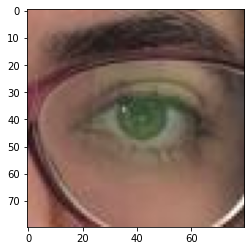

[[0.999212]]
../data/test/yourfolderforcroppedeyes/opened/327867760_594764842492235_1868613635924958884_n.jpg:has eyes openned


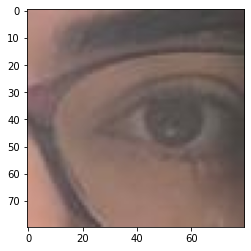

[[0.9998796]]
../data/test/yourfolderforcroppedeyes/opened/328850083_731856778560861_9036283887921550214_n.jpg:has eyes openned


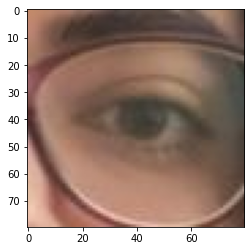

[[0.99945503]]
../data/test/yourfolderforcroppedeyes/opened/328908713_1401687160648422_2500127038507218711_n.jpg:has eyes openned


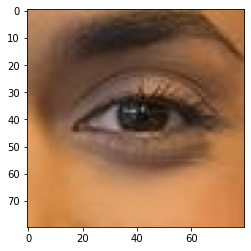

[[0.9996493]]
../data/test/yourfolderforcroppedeyes/opened/IMG_0155.jpg:has eyes openned


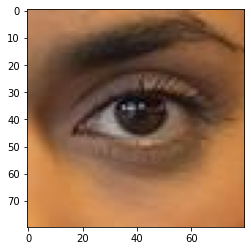

[[0.99999976]]
../data/test/yourfolderforcroppedeyes/opened/IMG_0156.jpg:has eyes openned


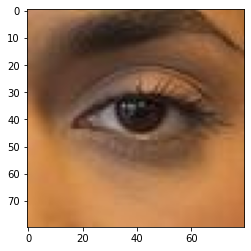

[[0.9997719]]
../data/test/yourfolderforcroppedeyes/opened/IMG_0157.jpg:has eyes openned


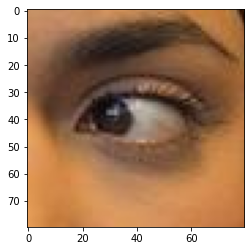

[[0.99906045]]
../data/test/yourfolderforcroppedeyes/opened/IMG_0158.jpg:has eyes openned


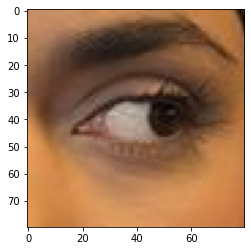

[[0.9989986]]
../data/test/yourfolderforcroppedeyes/opened/IMG_0159.jpg:has eyes openned


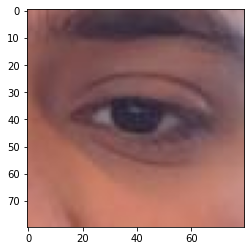

[[0.9993717]]
../data/test/yourfolderforcroppedeyes/opened/IMG_0794.jpg:has eyes openned


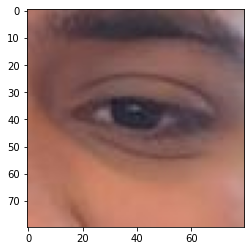

[[0.99953413]]
../data/test/yourfolderforcroppedeyes/opened/IMG_0795.jpg:has eyes openned


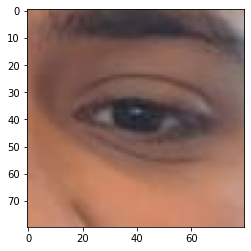

[[0.99908566]]
../data/test/yourfolderforcroppedeyes/opened/IMG_0796.jpg:has eyes openned


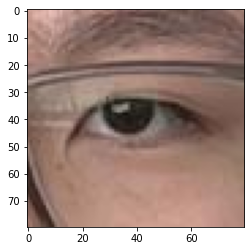

[[0.9997763]]
../data/test/yourfolderforcroppedeyes/opened/Photo on 2023-01-31 at 12.46 PM #3.jpg:has eyes openned


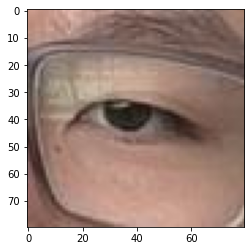

[[0.9999063]]
../data/test/yourfolderforcroppedeyes/opened/Photo on 2023-01-31 at 12.46 PM #4.jpg:has eyes openned


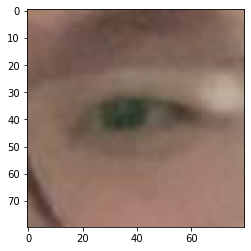

[[0.9996573]]
../data/test/yourfolderforcroppedeyes/opened/Photo on 2023-01-31 at 4.54 PM.jpg:has eyes openned


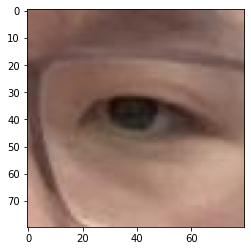

[[0.9992901]]
../data/test/yourfolderforcroppedeyes/opened/Photo on 2023-02-01 at 2.01 PM.jpg:has eyes openned


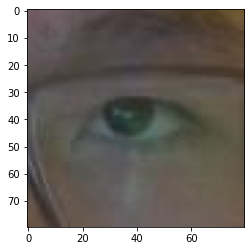

[[0.99986875]]
../data/test/yourfolderforcroppedeyes/opened/WIN_20221126_16_12_36_Pro.jpg:has eyes openned


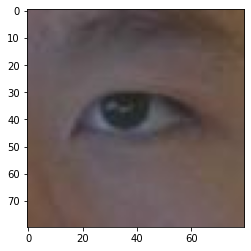

[[0.99992156]]
../data/test/yourfolderforcroppedeyes/opened/WIN_20221126_16_12_43_Pro.jpg:has eyes openned


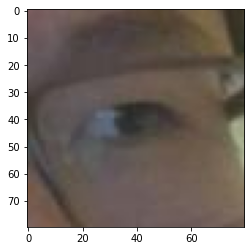

[[0.9999211]]
../data/test/yourfolderforcroppedeyes/opened/WIN_20221128_19_53_14_Pro.jpg:has eyes openned


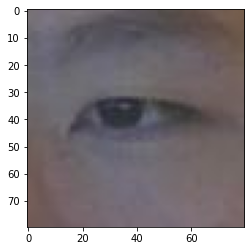

[[0.99994564]]
../data/test/yourfolderforcroppedeyes/opened/WIN_20221128_19_53_22_Pro.jpg:has eyes openned


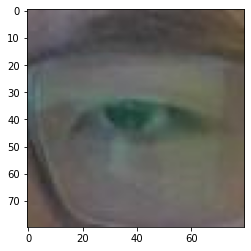

[[0.99984455]]
../data/test/yourfolderforcroppedeyes/opened/WIN_20221130_12_27_58_Pro.jpg:has eyes openned


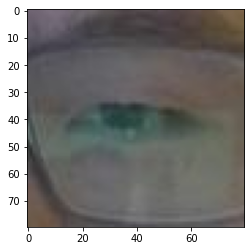

[[0.99878937]]
../data/test/yourfolderforcroppedeyes/opened/WIN_20221130_12_28_10_Pro.jpg:has eyes openned


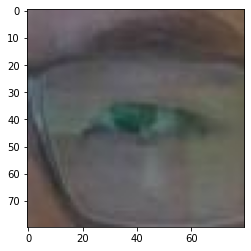

[[0.999527]]
../data/test/yourfolderforcroppedeyes/opened/WIN_20221130_12_28_12_Pro.jpg:has eyes openned


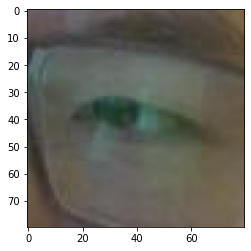

[[0.9997305]]
../data/test/yourfolderforcroppedeyes/opened/WIN_20221130_12_28_14_Pro.jpg:has eyes openned


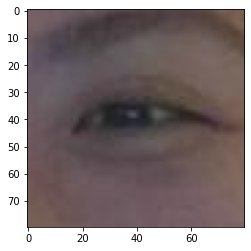

[[0.99931693]]
../data/test/yourfolderforcroppedeyes/opened/WIN_20221202_23_04_06_Pro.jpg.jpg:has eyes openned


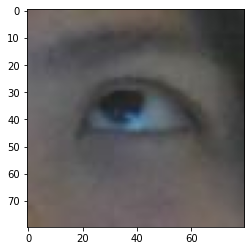

[[0.99991965]]
../data/test/yourfolderforcroppedeyes/opened/WIN_20221202_23_04_19_Pro.jpg.jpg:has eyes openned


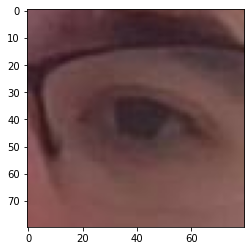

[[0.9997813]]
../data/test/yourfolderforcroppedeyes/opened/WIN_20230204_13_38_27_Pro.jpg:has eyes openned


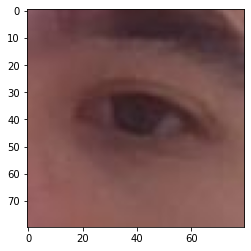

[[0.99943453]]
../data/test/yourfolderforcroppedeyes/opened/WIN_20230204_13_38_39_Pro.jpg:has eyes openned


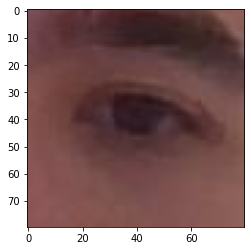

[[0.9998524]]
../data/test/yourfolderforcroppedeyes/opened/WIN_20230204_13_39_00_Pro.jpg:has eyes openned


In [23]:
# predicting images
for im in os.listdir("../data/test/yourfolderforcroppedeyes/opened/"):
    path = "../data/test/yourfolderforcroppedeyes/opened/" + im
    img = image.load_img(path, target_size=(80, 80, 3))
    x = image.img_to_array(img)
    x = x/255.0
    plt.imshow(x)
    plt.show()
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = model.predict(images)
    print(classes)
    if classes[0]>0.5:
        print(path+ ":has eyes openned")
    else:
        print(path+ " has eye closed")

In [14]:
model.save("eyes_model.h5")

In [2]:
reconstructed_model = keras.models.load_model("eyes_model.h5")

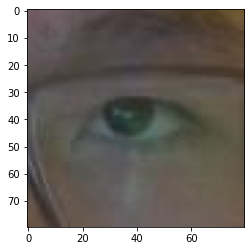

[[1.]]
../data/test/yourfolderforcroppedeyes/WIN_20221126_16_12_36_Pro.jpg.jpg:has eyes openned


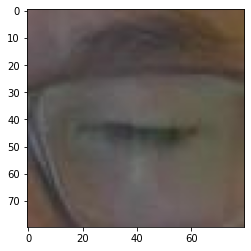

[[4.326674e-09]]
../data/test/yourfolderforcroppedeyes/WIN_20221126_16_12_38_Pro.jpg.jpg has eye closed


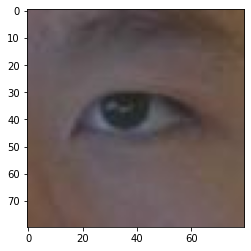

[[0.9999999]]
../data/test/yourfolderforcroppedeyes/WIN_20221126_16_12_43_Pro.jpg.jpg:has eyes openned


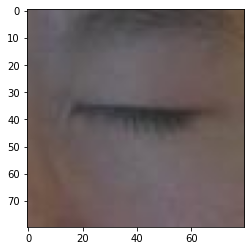

[[2.1610317e-08]]
../data/test/yourfolderforcroppedeyes/WIN_20221126_16_12_45_Pro.jpg.jpg has eye closed


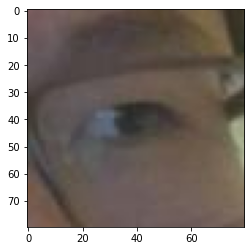

[[0.9996371]]
../data/test/yourfolderforcroppedeyes/WIN_20221128_19_53_14_Pro.jpg.jpg:has eyes openned


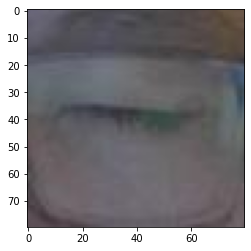

[[3.8990856e-05]]
../data/test/yourfolderforcroppedeyes/WIN_20221128_19_53_17_Pro.jpg.jpg has eye closed


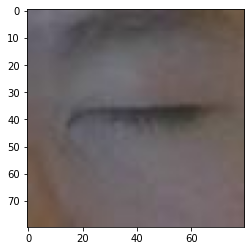

[[3.181872e-07]]
../data/test/yourfolderforcroppedeyes/WIN_20221128_19_53_20_Pro.jpg.jpg has eye closed


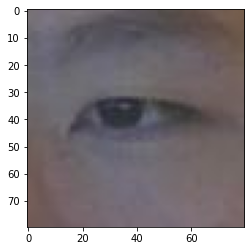

[[0.99998784]]
../data/test/yourfolderforcroppedeyes/WIN_20221128_19_53_22_Pro.jpg.jpg:has eyes openned


In [3]:
# predicting images
for im in os.listdir("../data/test/yourfolderforcroppedeyes"):
    path = "../data/test/yourfolderforcroppedeyes/" + im
    img = image.load_img(path, target_size=(80, 80, 3))
    x = image.img_to_array(img)
    x = x/255.0
    plt.imshow(x)
    plt.show()
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = reconstructed_model.predict(images)
    print(classes)
    if classes[0]>0.5:
        print(path+ ":has eyes openned")
    else:
        print(path+ " has eye closed")